<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_pentacen_C22H14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pentacen (C22H14)**

In [ ]:
!pip install pyscf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 46.1 MB/s eta 0:00:00


**Calculating Ground State energy with Hartree Fock SCF (using basis 6-31G)**

converged SCF energy = -382.861498203544


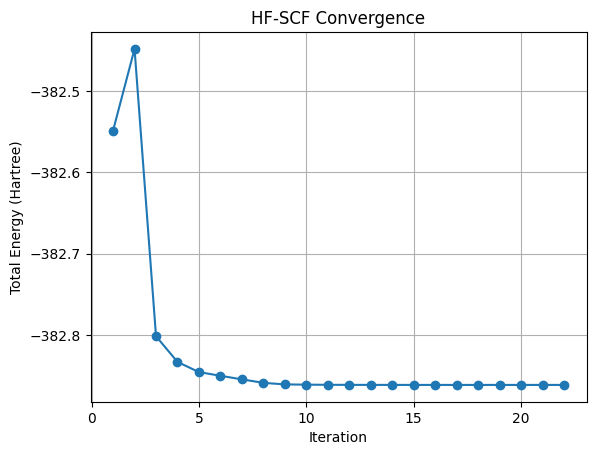

HF-SCF energy for Pentacene: -382.8614982035442 Hartree


In [ ]:
# Hartree-Fock SCF (Slater Determinant)
# First, ensure you have the PySCF package installed
from pyscf import gto, scf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    C   0.000000    0.000000    0.000000
    C   1.396000    0.000000    0.000000
    C   2.094000    1.209600    0.000000
    C   3.490000    1.209600    0.000000
    C   4.188000    0.000000    0.000000
    C   5.584000    0.000000    0.000000
    C   6.282000    1.209600    0.000000
    C   7.678000    1.209600    0.000000
    C   8.376000    0.000000    0.000000
    C   9.772000    0.000000    0.000000
    H  -0.551000   -0.951000    0.000000
    H   1.947000   -0.951000    0.000000
    H   1.947000    2.160600    0.000000
    H   3.041000   -0.951000    0.000000
    H   5.135000   -0.951000    0.000000
    H   6.229000   -0.951000    0.000000
    H   7.323000   -0.951000    0.000000
    H   8.417000   -0.951000    0.000000
    H   9.511000   -0.951000    0.000000
    H   9.511000    2.160600    0.000000
''',
    basis = '6-31G',  # Alternativelz´y: cc-pvdz
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation for a closed-shell system (H₂O)
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
# (callback function captures energy values at each iteration to track the convergence process)
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for Pentacene: {energy} Hartree")

**Calculating Ground State energy with DFT-SCF (using basis cc-pvdz)**

In [ ]:
from pyscf import gto, dft

# Define the pentacen molecule
mol = gto.Mole()
mol.atom = '''
    C   0.000000    0.000000    0.000000
    C   1.396000    0.000000    0.000000
    C   2.094000    1.209600    0.000000
    C   3.490000    1.209600    0.000000
    C   4.188000    0.000000    0.000000
    C   5.584000    0.000000    0.000000
    C   6.282000    1.209600    0.000000
    C   7.678000    1.209600    0.000000
    C   8.376000    0.000000    0.000000
    C   9.772000    0.000000    0.000000
    H  -0.551000   -0.951000    0.000000
    H   1.947000   -0.951000    0.000000
    H   1.947000    2.160600    0.000000
    H   3.041000   -0.951000    0.000000
    H   5.135000   -0.951000    0.000000
    H   6.229000   -0.951000    0.000000
    H   7.323000   -0.951000    0.000000
    H   8.417000   -0.951000    0.000000
    H   9.511000   -0.951000    0.000000
    H   9.511000    2.160600    0.000000
'''

mol.basis = 'cc-pvdz'
mol.verbose = 4
mol.build()

# Perform a DFT calculation using the B3LYP functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
energy = mf.kernel()

print(f"DFT energy for Methane (CH₄) using B3LYP: {energy} Hartree")

System: uname_result(system='Linux', node='ac8b2ca3a8e1', release='6.1.85+', version='#1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024', machine='x86_64')  Threads 2
Python 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy 1.26.4  scipy 1.13.1  h5py 3.11.0
Date: Fri Oct 11 14:08:41 2024
PySCF version 2.7.0
PySCF path  /usr/local/lib/python3.10/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 20
[INPUT] num. electrons = 70
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr   0.0
[INPUT]  2 C      1.396000000000   0.000000000000   0.000000000000 AA    2.638057669893   0.000000000000   0.000000000000 Bohr   0.

**Calculating Ground State energy with Quantum Variational Eigensolver (using Pennylane and OpenFermion)**

https://www.newscientist.com/article/2227244-google-has-performed-the-biggest-quantum-chemistry-simulation-ever/

In [ ]:
!pip install pennylane openfermion openfermionpyscf -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.7 MB/s eta 0:00:00


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct 11 14:43:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

The amount of RAM required to compute the ground state energy of pentacene depends on several factors, such as the computational method (e.g., Hartree-Fock, Density Functional Theory (DFT), or coupled-cluster methods), the basis set used, and the size of the system.

Pentacene (C22H14) is a moderately large molecule with 36 atoms, which results in a significant number of orbitals and electrons that need to be considered in quantum chemical calculations. Here's a general breakdown:

1. **Method Used**:
   - **Hartree-Fock (HF)** or **Density Functional Theory (DFT)** with small basis sets like STO-3G or 6-31G may not require an excessive amount of RAM (from 8 GB to 32 GB), but the results may not be highly accurate.
   - **Post-Hartree-Fock methods** such as **Coupled Cluster (CCSD)**, **Møller-Plesset perturbation theory (MP2)**, or **Configuration Interaction (CI)** are much more memory-intensive and may require 64 GB or more of RAM depending on the level of approximation and the basis set.

2. **Basis Set Size**:
   - **Small Basis Sets** (e.g., STO-3G, 6-31G): 8–32 GB.
   - **Medium Basis Sets** (e.g., 6-311G**): 32–128 GB.
   - **Large Basis Sets** (e.g., cc-pVTZ, aug-cc-pVDZ): 128 GB or more, especially for methods beyond DFT.

3. **Approximation Level**:
   - For large, correlated methods like **CCSD(T)** (Coupled Cluster with Single, Double, and perturbative Triple excitations), you may need 256 GB or more depending on the basis set and computational resources.

For practical DFT calculations with medium-sized basis sets, a workstation with 64 GB of RAM should be sufficient. However, for higher accuracy and methods that account for electron correlation more explicitly, you might need a high-performance computing cluster or a workstation with 128 GB or more of RAM.

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import get_fermion_operator, jordan_wigner
from pennylane import qchem

# Define the molecular geometry of pentacene (simplified for this example)
geometry = [('C', (0.000000, 0.000000, 0.000000)),
            ('C', (1.396000, 0.000000, 0.000000)),
            ('C', (2.094000, 1.209600, 0.000000)),
            ('C', (3.490000, 1.209600, 0.000000)),
            ('C', (4.188000, 0.000000, 0.000000)),
            ('C', (5.584000, 0.000000, 0.000000)),
            ('C', (6.282000, 1.209600, 0.000000)),
            ('C', (7.678000, 1.209600, 0.000000)),
            ('C', (8.376000, 0.000000, 0.000000)),
            ('C', (9.772000, 0.000000, 0.000000)),
            ('H', (-0.551000, -0.951000, 0.000000)),
            ('H', (1.947000, -0.951000, 0.000000)),
            ('H', (1.947000, 2.160600, 0.000000)),
            ('H', (3.041000, -0.951000, 0.000000)),
            ('H', (5.135000, -0.951000, 0.000000)),
            ('H', (6.229000, -0.951000, 0.000000)),
            ('H', (7.323000, -0.951000, 0.000000)),
            ('H', (8.417000, -0.951000, 0.000000)),
            ('H', (9.511000, -0.951000, 0.000000)),
            ('H', (9.511000, 2.160600, 0.000000))]

# Set up the molecular parameters
basis = 'sto-3g'  # Basis set
charge = 0  # Neutral molecule
multiplicity = 1  # Singlet

# Step 1: Generate the molecular Hamiltonian using OpenFermion and PySCF
molecular_hamiltonian = generate_molecular_hamiltonian(geometry, basis, multiplicity, charge)

# Step 2: Convert the molecular Hamiltonian into a qubit Hamiltonian using Jordan-Wigner transformation
fermion_hamiltonian = get_fermion_operator(molecular_hamiltonian)
qubit_hamiltonian = jordan_wigner(fermion_hamiltonian)

# Step 3: Set up the quantum device for PennyLane
n_qubits = qchem.hf_orbitals(basis, geometry, multiplicity, charge)
dev = qml.device('default.qubit', wires=n_qubits)

# Step 4: Define the ansatz using PennyLane's UCCSD
def ansatz(params, wires):
    qml.qchem.UCCSD(params, wires=wires)

# Step 5: Define the cost function for VQE
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(n_qubits))
    return qml.expval(qubit_hamiltonian)

# Step 6: Set up the VQE optimization
params = np.random.normal(0, np.pi, len(qubit_hamiltonian.terms))  # Initialize parameters
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)

# Run the optimization to find the ground state energy
max_iterations = 100
conv_tol = 1e-6

for n in range(max_iterations):
    params, energy = optimizer.step_and_cost(cost_fn, params)
    if n % 10 == 0:
        print(f"Iteration: {n}, Energy: {energy:.6f} Hartree")

    if np.abs(energy - cost_fn(params)) < conv_tol:
        break

print(f"Final estimated ground state energy: {energy:.6f} Hartree")
